In [1]:
from dotenv import load_dotenv
import os
import sys

sys.path.append('../')

load_dotenv()

config = {
    "base_url": os.getenv("BASE_URL"),
    "client_id": os.getenv("CLIENT_ID"),
    "client_secret": os.getenv("CLIENT_SECRET")
}


In [2]:
import pandas as pd

df = pd.read_csv('../data/transactions.csv')

df.head()

,id,account,created_at,type,amount,status,currency,value_date,description,collected_at,counterparty,transacted_at,operation_type,internal_identification,inferred_accounting_date
0,00017ce9-4a85-49bf-9e21-2842f06ff5d5,"{'id': '5b2073be-5ed5-48bb-8d42-242c9402eb8d',...",2025-07-31T11:59:14.680861Z,OUTFLOW,771.52,PROCESSED,BRL,2025-01-25,PAGAMENTO,2025-07-31T11:58:56.032624Z,"{'name': None, 'type': 'INDIVIDUAL', 'agency':...",2025-01-25T03:01:13.613Z,CARTAO,20279336-7e3c-4628-8301-7f7ff43aa5a1,2025-01-27
1,0029a175-8a99-4695-beb7-bfccf50365cf,"{'id': '5b2073be-5ed5-48bb-8d42-242c9402eb8d',...",2025-07-31T11:59:14.702401Z,OUTFLOW,771.52,PROCESSED,BRL,2025-01-22,PAGAMENTO,2025-07-31T11:58:56.407697Z,"{'name': None, 'type': 'INDIVIDUAL', 'agency':...",2025-01-22T03:01:13.613Z,CARTAO,3b6839e5-1aeb-4f40-8faf-58b7729c3d56,2025-01-22
2,006f7aa4-c8b0-4416-aa80-8373badeb0e4,"{'id': '5b2073be-5ed5-48bb-8d42-242c9402eb8d',...",2025-07-31T11:59:14.670951Z,OUTFLOW,771.52,PROCESSED,BRL,2025-01-27,PAGAMENTO,2025-07-31T11:58:55.920124Z,"{'name': None, 'type': 'INDIVIDUAL', 'agency':...",2025-01-27T03:01:13.613Z,CARTAO,2b686d54-8971-4df4-842a-c2bd0fb49f20,2025-01-27
3,0077a313-08e9-4258-ab1a-f9ebc330ac46,"{'id': '50ae652a-41b9-44d9-a5cb-7ed6203c733a',...",2025-07-31T11:59:14.691694Z,OUTFLOW,771.52,PROCESSED,BRL,2025-01-23,PAGAMENTO,2025-07-31T11:59:10.827392Z,"{'name': None, 'type': 'INDIVIDUAL', 'agency':...",2025-01-23T03:01:13.613Z,CARTAO,9096cb55-3b4f-4f7b-a1ff-a949bfe254ce,2025-01-23
4,0084da46-d916-429d-a33b-6726378e6156,"{'id': '50ae652a-41b9-44d9-a5cb-7ed6203c733a',...",2025-07-31T11:59:14.579266Z,OUTFLOW,771.52,PROCESSED,BRL,2025-07-23,PAGAMENTO,2025-07-31T11:59:10.734838Z,"{'name': None, 'type': 'INDIVIDUAL', 'agency':...",2025-07-23T03:01:13.613Z,CARTAO,eb528819-f66b-44f5-9594-0496641374af,2025-07-23


In [3]:
import json

def extract_account_info(account):
    account_info = json.loads(account.replace("'", '"'))
    return pd.Series({
        "account_category": account_info["category"],
        "account_number": account_info["number"],
        "account_name": account_info["name"]
    })

df[["account_category", "account_number", "account_name"]] = df["account"].apply(extract_account_info)


In [4]:
df.account_category.value_counts()

account_category
SAVINGS_ACCOUNT     1234
CHECKING_ACCOUNT    1060
Name: count, dtype: int64

In [5]:
df_savings = df[df['account_category']=='SAVINGS_ACCOUNT']
df_checking = df[df['account_category']=='CHECKING_ACCOUNT']

<Axes: >

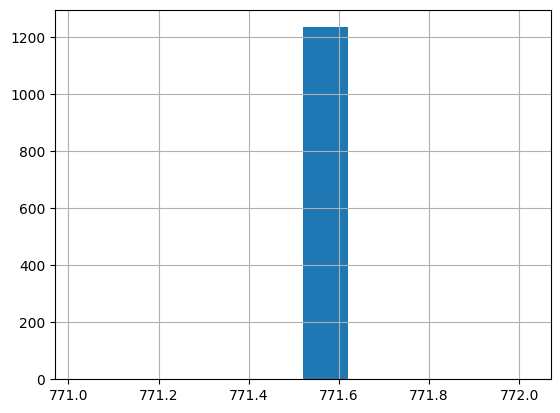

In [6]:
df_savings.amount.hist()

In [7]:
df_savings.amount.describe()

count    1.234000e+03
mean     7.715200e+02
std      1.137329e-13
min      7.715200e+02
25%      7.715200e+02
50%      7.715200e+02
75%      7.715200e+02
max      7.715200e+02
Name: amount, dtype: float64

<Axes: >

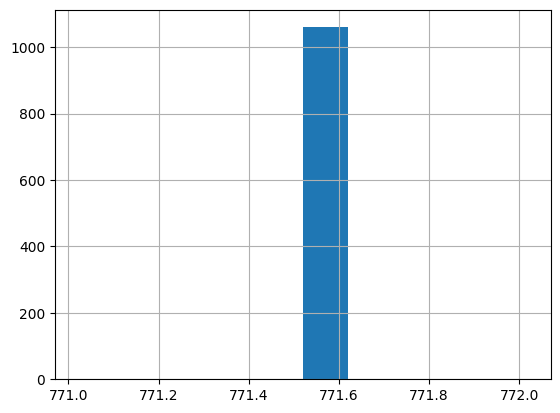

In [8]:
df_checking.amount.hist()

In [11]:
df_checking.amount.describe()

count    1.060000e+03
mean     7.715200e+02
std      1.137405e-13
min      7.715200e+02
25%      7.715200e+02
50%      7.715200e+02
75%      7.715200e+02
max      7.715200e+02
Name: amount, dtype: float64

In [12]:
df.value_date.value_counts()

value_date
2025-01-25    121
2025-01-22    121
2025-01-23    121
2025-01-24    121
2025-01-21    121
             ... 
2024-09-12      1
2024-08-13      1
2024-12-28      1
2024-12-01      1
2024-10-31      1
Name: count, Length: 180, dtype: int64

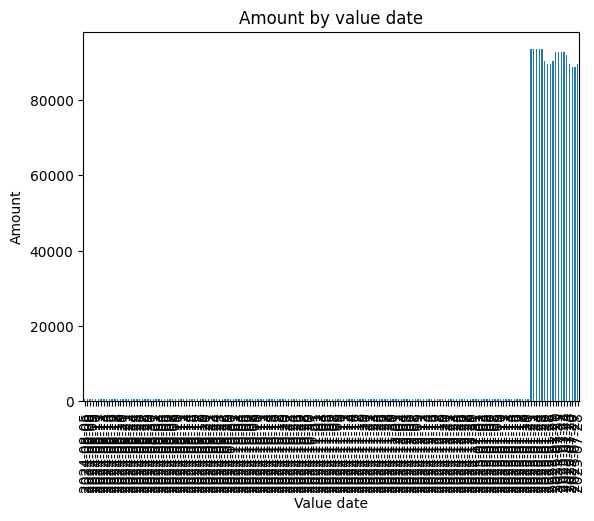

In [16]:
import matplotlib.pyplot as plt

df.groupby('value_date')['amount'].sum().plot(kind='bar')
plt.title('Amount by value date')
plt.xlabel('Value date')
plt.ylabel('Amount')
plt.show()


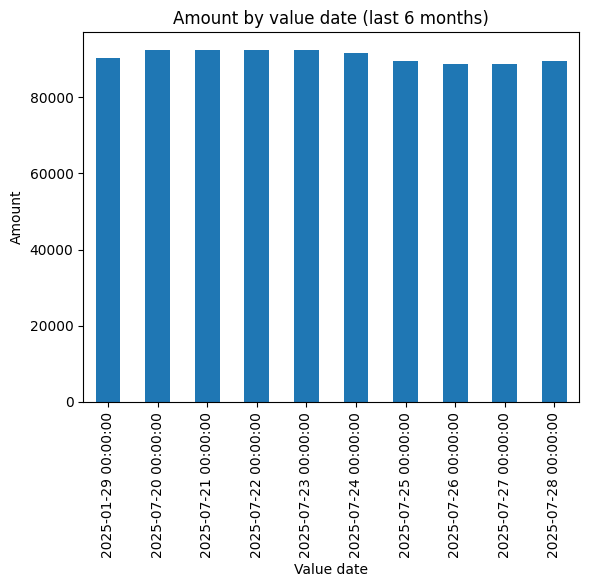

In [20]:
import matplotlib.pyplot as plt
df['value_date'] = pd.to_datetime(df['value_date'])
last_six_months = df['value_date'].max() - pd.DateOffset(months=6)
df_last_six_months = df[df['value_date'] > last_six_months]

df_last_six_months.groupby('value_date')['amount'].sum().plot(kind='bar')
plt.title('Amount by value date (last 6 months)')
plt.xlabel('Value date')
plt.ylabel('Amount')
plt.show()


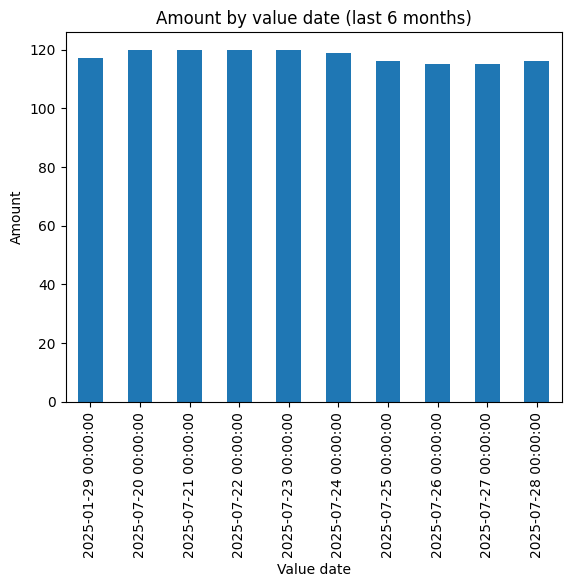

In [21]:
import matplotlib.pyplot as plt
df['value_date'] = pd.to_datetime(df['value_date'])
last_six_months = df['value_date'].max() - pd.DateOffset(months=6)
df_last_six_months = df[df['value_date'] > last_six_months]

df_last_six_months.groupby('value_date')['amount'].count().plot(kind='bar')
plt.title('Amount by value date (last 6 months)')
plt.xlabel('Value date')
plt.ylabel('Amount')
plt.show()


In [40]:
df_invoices = pd.read_csv('../data/invoices.csv')

In [41]:
df_invoices.head()

,id,link,created_at,type,usage,status,payroll,version,payments,sender_id,...,exchange_rate,receiver_name,payment_method,place_of_issue,discount_amount,invoice_details,subtotal_amount,certification_date,invoice_identification,certification_authority
0,67b1839f-13a9-4c07-a23d-cadf2645f05b,c4432b21-b248-4bff-ab46-05ec06a22da1,2025-07-31T12:00:44.246920Z,INFLOW,G03,Vigent,"{'days': None, 'type': None, 'amount': 40.2, '...",3.3,"[{'date': '2025-06-21T09:38:27.254442', 'amoun...",PEVS00050734I,...,1,Receptor F967,PUE,11000,0.0,"[{'quantity': 1, 'unit_code': 'ACT', 'tax_amou...",0.00,2025-05-16T09:06:22.620431,4b11e71a-948a-3b5f-3634-9f783d3fc39,f224b774924b3
1,c57021f2-4055-4d72-84b5-6782a8707b33,c4432b21-b248-4bff-ab46-05ec06a22da1,2025-07-31T12:00:44.246899Z,INFLOW,G03,Vigent,"{'days': None, 'type': None, 'amount': 40.2, '...",3.3,[],REBF170804BSQ,...,1,Receptor 9264,PPD,11000,1278.0,"[{'quantity': 5, 'unit_code': 'E48', 'tax_amou...",62068.55,2025-07-06T03:37:11.877383,fb12ad63-6c12-47bf-5565-b1e6b335a25,dacdbadfabdfe
2,1c0b33b0-9b06-4ccc-a354-44aca5b772b3,c4432b21-b248-4bff-ab46-05ec06a22da1,2025-07-31T12:00:44.246878Z,OUTFLOW,G03,Vigent,"{'days': None, 'type': None, 'amount': 40.2, '...",3.3,[],WONZ231224NY5,...,1,Receptor EFFA,PPD,11000,13044.0,"[{'quantity': 9, 'unit_code': 'E48', 'tax_amou...",88995.27,2025-05-25T04:32:15.287479,fddc6c3d-ba7e-1627-72f7-fc8ae9314e5,2788274f4e78c
3,72248a88-5ae1-4860-9e1c-d003f14264f1,c4432b21-b248-4bff-ab46-05ec06a22da1,2025-07-31T12:00:44.246857Z,OUTFLOW,G03,Vigent,"{'days': None, 'type': None, 'amount': 40.2, '...",3.3,"[{'date': '2025-05-08T18:24:52.975934', 'amoun...",QIMV571204G07,...,1,Receptor 8342,PPD,11000,0.0,"[{'quantity': 1, 'unit_code': 'ACT', 'tax_amou...",0.00,2025-06-28T02:01:29.781181,fe81c6c3-aa6c-ebc1-61db-38ad5d9fbce,9b3ee1e62c814
4,5d65feea-e140-496c-927d-085975a492a5,c4432b21-b248-4bff-ab46-05ec06a22da1,2025-07-31T12:00:44.246835Z,OUTFLOW,G03,Vigent,"{'days': None, 'type': None, 'amount': 40.2, '...",3.3,[],HEAA771128VCX,...,1,Receptor 1BAE,PPD,11000,9426.0,"[{'quantity': 1, 'unit_code': 'E48', 'tax_amou...",65730.90,2025-07-13T08:50:14.313874,be296788-b2f2-1688-96a4-5497188d74e,fe5865f14f5fc


In [47]:
json.loads(df_invoices["invoice_details"].iloc[0].replace("'", '"').replace("None", "null"))

[{'quantity': 1,
  'unit_code': 'ACT',
  'tax_amount': 0.0,
  'description': 'Pago',
  'unit_amount': 0,
  'collected_at': '2025-07-31T12:00:01.821589Z',
  'expense_type': None,
  'payment_type': None,
  'total_amount': 0.0,
  'payment_method': None,
  'pre_tax_amount': 0,
  'retained_taxes': [],
  'tax_percentage': 0,
  'unit_description': 'Producto 95FB',
  'invoice_identification': None,
  'product_identification': '84111506',
  'payment_type_description': None,
  'payment_method_description': None}]

<Axes: >

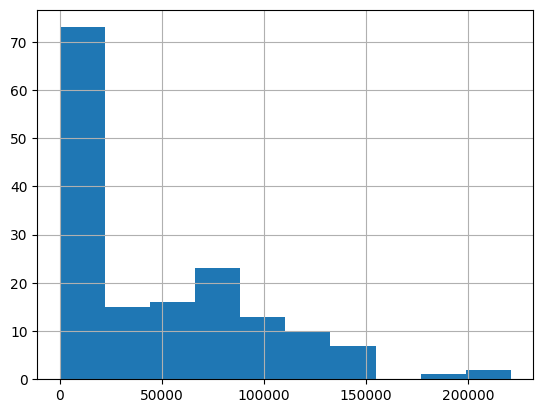

In [49]:
df_invoices.total_amount.hist()

In [50]:
df_invoices.groupby(['type','invoice_type'])['total_amount'].agg(['mean','std'])

mean           std
type    invoice_type                            
INFLOW  Egreso        71629.727895  51696.542531
        Ingreso       62967.659167  40064.651784
        Nómina         6153.824118   3550.619090
        Pago              0.000000      0.000000
        Traslado      77660.733500  49637.012747
OUTFLOW Egreso        52352.082500  48262.773324
        Ingreso       86878.426500  39135.868559
        Nómina         6201.715000   3139.663771
        Pago              0.000000      0.000000
        Traslado      78263.373571  36394.306803

In [55]:
df_invoices['created_at_date'] = pd.to_datetime(df_invoices['created_at']).dt.date


In [58]:
df_invoices['invoice_date'].value_counts()

invoice_date
2024-01-16    4
2023-01-02    3
2023-01-23    3
2025-07-26    3
2025-01-14    2
             ..
2022-03-17    1
2022-03-30    1
2023-01-13    1
2023-01-16    1
2025-08-21    1
Name: count, Length: 129, dtype: int64

Text(0.5, 1.0, 'OUTFLOW')

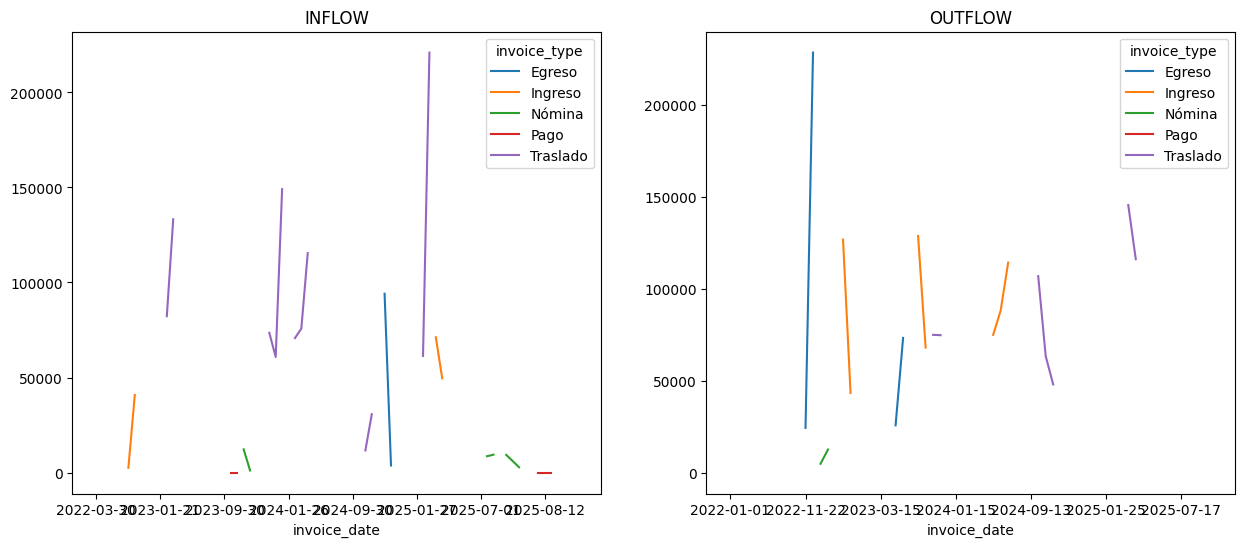

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
df_invoices_inflow = df_invoices[df_invoices.type == 'INFLOW'].groupby(['invoice_date', 'invoice_type'])['total_amount'].sum()
df_invoices_inflow.unstack().plot(kind='line', ax=ax[0])
ax[0].set_title('INFLOW')
df_invoices_outflow = df_invoices[df_invoices.type == 'OUTFLOW'].groupby(['invoice_date', 'invoice_type'])['total_amount'].sum()
df_invoices_outflow.unstack().plot(kind='line', ax=ax[1])
ax[1].set_title('OUTFLOW')


In [91]:
df_invoices_inflow.reset_index()

,invoice_date,invoice_type,total_amount
0,2022-03-30,Egreso,130656.05
1,2022-04-11,Traslado,192831.98
2,2022-04-29,Nómina,9835.64
3,2022-06-09,Egreso,68801.51
4,2022-06-21,Nómina,12128.94
...,...,...,...
78,2025-08-18,Pago,0.00
79,2025-08-21,Egreso,25305.43
80,2025-08-22,Nómina,4690.03
81,2025-08-28,Ingreso,34976.84


In [92]:
df_invoices_outflow.reset_index()

,invoice_date,invoice_type,total_amount
0,2022-01-01,Traslado,88717.12
1,2022-01-27,Ingreso,146254.37
2,2022-02-27,Egreso,68135.40
3,2022-03-17,Ingreso,15844.82
4,2022-04-28,Nómina,6915.39
...,...,...,...
66,2025-07-26,Traslado,13876.07
67,2025-08-19,Nómina,7265.86
68,2025-08-22,Ingreso,121976.39
69,2025-08-23,Egreso,104506.15
